## Supervised Learning -  Project Campaign for selling personal loans 

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.



### Overview:

1. Read the column description and ensure you understand each attribute well

2. Study the data distribution in each attribute, share your findings. (10 points)

3. Get the target column distribution. 

4. Split the data into training and test set in the ratio of 70:30 respectively

5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)

6. Print the confusion matrix for all the above models (10 points)

7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)


## Problem Statement 

Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)

## Dataset 

The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customers relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

DataSet-Bank_Personal_Loan_Modelling.csv
Column Descrition - TheraBank_Column_Description.xlsx


## Exploring the Data

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")               
Thera_bank_df=bank_df
Thera_bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
Thera_bank_df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Question 3
## Study the data distribution in each attribute, share your findings. (10 points)

#### Answer:

In [3]:
# From the above description we find that min value of experience is -ve 
# Mean and Median are the same for Age and Experience Variables which means that both of these are Normally distributed.
# There 52 people with Negative Experience.
# Number of customer who responded to Personal Loan offer is 480
# Number of customers with Deposits are 302.
# People having loan have high Mortgage. (please have a look at the Box plot below)
# Income of most of the people who have taken the Personal Loan is the same.(Please see the Boxplot below)
# Mean value of income is more for Education level 1
# People having CD account also havea a Personal Loan ( Please see the Countplot below)
# Experience and Age are Positively Correlated. Correlation varies with Educational level
# Family with Income above 100 only have taken the loan

In [4]:
# Number of 1s in Personal loan or Number of respondents to the previous loan campaign.
print("Number of Likely Asset Customers who Responded to the Personal Loan Offer \n",bank_df["Personal Loan"].sum())
print("Number of Depositors Liability Customers \n",bank_df["CD Account"].sum())    
print("People with Negative Experience \n",bank_df[bank_df['Experience'] < 0]['Experience'].count())

Number of Likely Asset Customers who Responded to the Personal Loan Offer 
 480
Number of Depositors Liability Customers 
 302
People with Negative Experience 
 52


In [5]:
#isnull() function returns a boolean output and sum() gives the number of true values which is a count of missiing numbers.
if (bank_df.isnull().sum().sum()==0):
    print("There are no missing values \n",bank_df.isnull().sum().sum())


There are no missing values 
 0


In [6]:
#bank_df.apply(lambda x : sum(x.isnull()))


In [7]:
#Checking customers with Negative  Experience.
Exp = bank_df.loc[bank_df['Experience'] >0]
negExp = bank_df.Experience < 0
column_name = 'Experience'
#Getting the custmer ID with Negative Experience
neg_exp_list = bank_df.loc[negExp]['ID'].tolist() 
print(neg_exp_list)

[90, 227, 316, 452, 525, 537, 541, 577, 584, 598, 650, 671, 687, 794, 890, 910, 1174, 1429, 1523, 1906, 2103, 2431, 2467, 2546, 2619, 2718, 2849, 2877, 2963, 2981, 3077, 3131, 3158, 3280, 3285, 3293, 3395, 3426, 3627, 3797, 3825, 3888, 3947, 4016, 4089, 4117, 4286, 4412, 4482, 4515, 4583, 4958]


In [8]:
#sns.pairplot(bank_df.iloc[:,1:])

In [9]:
#The following code does the below steps:
# For each of the IDs  in neg_exp_list it finds the corresponding age and education.
# It finds the median of experience for  the records with corresponding age and education.
# Replaces the negative experience values with the median of experience.
# Apply the median back to the location which had negative experience

In [10]:
for id in neg_exp_list:
    age = bank_df.loc[np.where(bank_df['ID']==id)]["Age"].tolist()[0]
    education = bank_df.loc[np.where(bank_df['ID']==id)]["Education"].tolist()[0]
    df_filtered = Exp[(Exp.Age == age) & (Exp.Education == education)]
    exp = df_filtered['Experience'].median()
    bank_df.loc[bank_df.loc[np.where(bank_df['ID']==id)].index, 'Experience'] = exp

In [11]:
# checking if there are records with negative experience
bank_df[bank_df['Experience'] < 0]['Experience'].count()
print("Customer's with Negative Experience is \n",bank_df[bank_df['Experience'] < 0]['Experience'].count()) 

Customer's with Negative Experience is 
 0


In [12]:
bank_df.describe()
#There are no Negative numbers for any of the features now. The Min value of Experience is now =0.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


All people who have taken the loan have almost the same income orange box

Mean value of income is more for Education level 1



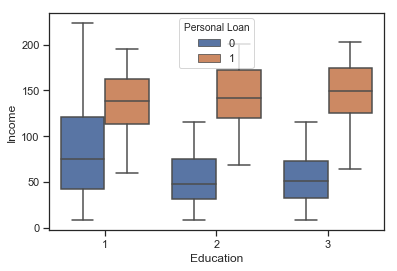

In [13]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_df)
print("All people who have taken the loan have almost the same income orange box\n")
print("Mean value of income is more for Education level 1\n")

People having loan have high Mortgage Dark Green Box


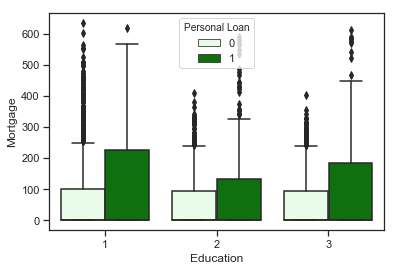

In [14]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank_df,color='green')
print("People having loan have high Mortgage Dark Green Box")

Most people who have CD Account also have a loan


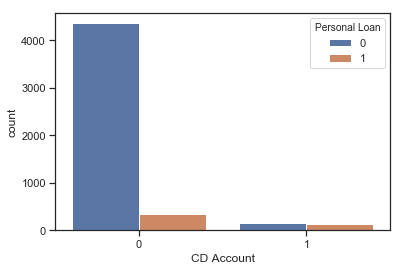

In [15]:
sns.countplot(x='CD Account',data=bank_df,hue='Personal Loan')
print("Most people who have CD Account also have a loan")

Family with Income above 100 only have taken the loan



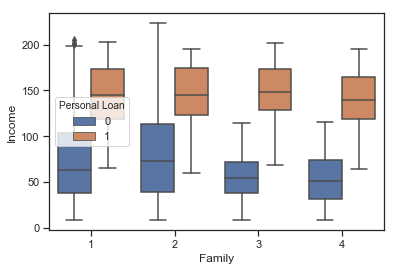

In [16]:
sns.boxplot(x="Family", y='Income', hue="Personal Loan", data=bank_df)
print("Family with Income above 100 only have taken the loan\n")

Experience and Age are Positively Correlated. Correlation varies with Educational level


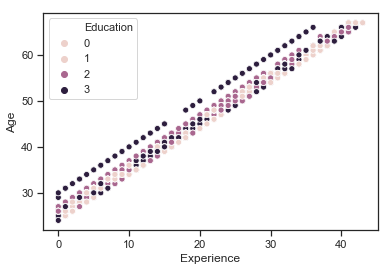

In [17]:
sns.scatterplot(x="Experience", y="Age", data=bank_df,hue='Education')
plot.xlabel('Experience')
plot.ylabel('Age')
bank_df[["Experience","Age"]].corr()
print("Experience and Age are Positively Correlated. Correlation varies with Educational level")

##  Separate features and target into separate dataframes and name them X and y respectively.


In [46]:
train_set_indep = bank_df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
#print(train_set_indep.head())
train_set_dep = bank_df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :] # Splitting the data into 70% Training and 30 % Test
X_Test = X[3501: , :] # 30% Test data
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

## Model Implementation and Testing the Accuracy

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
# Fitting the Logistic Regression model on the Training Data
model.fit(X_Train, Y_Train)
# Use of the model on the Test Data
y_predict = model.predict(X_Test)
model_score = model.score(X_Test, Y_Test)
print("Accuracy of logistic regression classifier on test set:")
print(model_score)
from sklearn.metrics import  confusion_matrix
confusionMatrix = confusion_matrix(Y_Test, y_predict)
print("Confusion Matrix \n",confusionMatrix)
print(metrics.classification_report(Y_Test, y_predict))
print(metrics.confusion_matrix(Y_Test, y_predict))

Accuracy of logistic regression classifier on test set:
0.9079386257505003
Confusion Matrix 
 [[1328   45]
 [  93   33]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.42      0.26      0.32       126

   micro avg       0.91      0.91      0.91      1499
   macro avg       0.68      0.61      0.64      1499
weighted avg       0.89      0.91      0.90      1499

[[1328   45]
 [  93   33]]


C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
#expected = y_test
#predicted = model.predict(X_test)
# summarize the fit of the model
#print(metrics.classification_report(expected, predicted))
#print("Confusion Matrix for the Test Set \n",metrics.confusion_matrix(expected, predicted))

# KNN ( K - Nearest Neighbour )

In [48]:
train_set_indep = bank_df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = bank_df["Personal Loan"]
# Splitting the data into Training set and Test set by dropping unwanted collumns/features
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :] # 70% Training Records of the features.
X_Test = X[3501: , :] # 30% Test Records of the features
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]
print(Y_Test)

[0 0 0 ... 0 0 0]


In [55]:
# Using the KNN algorithm with 300 neighbours.(i.e. Tried all different values from 3 to 300, the variation is .90 to .91)
knn = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
knn_predict = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, knn_predict)
print(acc)

0.9039359573048699


In [56]:
from sklearn.metrics import  confusion_matrix
confusionMatrix = confusion_matrix(Y_Test, knn_predict)
print("Confusion Matrix \n",confusionMatrix)
print(metrics.classification_report(Y_Test, knn_predict))
print(metrics.confusion_matrix(Y_Test, knn_predict))

Confusion Matrix 
 [[1321   52]
 [  92   34]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1373
           1       0.40      0.27      0.32       126

   micro avg       0.90      0.90      0.90      1499
   macro avg       0.67      0.62      0.63      1499
weighted avg       0.89      0.90      0.90      1499

[[1321   52]
 [  92   34]]


# # Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
# Fitting the Naive Bayes model on the Trainng set
naive_model.fit(X_Train, Y_Train)
#Testing the Naive Bayes Model using the Test data
naive_predict = naive_model.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, naive_predict)
print(acc)
#naive_model.score(Y_Test,naive_predict)

0.8839226150767178


In [50]:
from sklearn.metrics import  confusion_matrix
confusionMatrix = confusion_matrix(Y_Test,naive_predict)
print(confusionMatrix)

[[1260  113]
 [  61   65]]


In [37]:
# make predictions
# summarize the fit of the model
print(metrics.classification_report(Y_Test, naive_predict))
print(metrics.confusion_matrix(Y_Test, naive_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1373
           1       0.37      0.52      0.43       126

   micro avg       0.88      0.88      0.88      1499
   macro avg       0.66      0.72      0.68      1499
weighted avg       0.90      0.88      0.89      1499

[[1260  113]
 [  61   65]]


## Model Comparison

In [60]:
X=bank_df.drop(['Personal Loan','Experience','ID'],axis=1)
Y=bank_df.pop('Personal Loan')

C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

LR: 0.908400 (0.007579)
KNN: 0.899600 (0.005748)
NB: 0.886600 (0.004964)


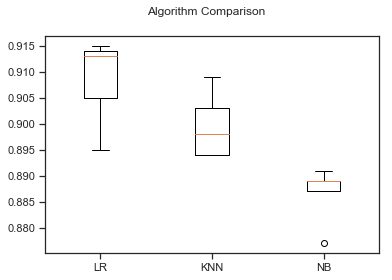

In [61]:
# Declare threee lists for Model,results and names of the models and append the corresponding values to the lists
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# Comparison of each of the models listed in the model list
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=10)
    cv_score = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_score)
    names.append(name)
    score_val = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(score_val)
# boxplot algorithm comparison
fig = plot.figure()
fig.suptitle('Algorithm Comparison') # Adds the title to the boxplot
#print("Algorithm Comparison")
ax = fig.add_subplot(1,1,1)
plot.boxplot(results)
ax.set_xticklabels(names) # Adds the names of the algorithm to the X axis.
plot.show()

In [ ]:
#Conclusion: The accuracy precision,recall and F1 scores of all the three models have been computed and printed. 
# Logistic regression is the best the Mean score for the Logistic Regression is .908. Mean score for KNN is .899 and for 
#Naive Bayes it is .886 with a very low standard deviation for all three cases.
#The algorithm comparison is illustrated in the boxplot.
# The classification accuracy is the best for logistic regession.
# The logistic regression model would help the bank (Thera Bank) to identify the potential customers who have higher 
# probability of purchasing the loan. 